# <Step1. 탐색> : 데이터의 기초 정보 살펴보기
# Chipotle 데이터셋의 기본 정보

In [2]:
import pandas as pd

chipo = pd.read_csv('../data/chipotle.tsv', sep = '\t')


# chipotle 데이터셋의 행과 열, 데이터

In [3]:
chipo.head(10).fillna(0)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,0,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,0,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,0,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# unique 함수로 범주형 피처의 개수 출력하기

In [4]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


# [가장 많이 주문한 item]

In [5]:
item_count = chipo['item_name'].value_counts()[:10]

for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ':', val, cnt)

chipo['item_name'].value_counts().index.tolist()[0]

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


'Chicken Bowl'

# [item 당 주문 개수와 총량 구하기]

In [6]:
order_count = chipo.groupby('item_name')['order_id'].count()
print(order_count[:10])
print('---------------------------------')
item_quantity = chipo.groupby('item_name')['quantity'].sum()
print(item_quantity[:10])

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64
---------------------------------
item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64


# [시각화로 분석 결과 살펴보기]

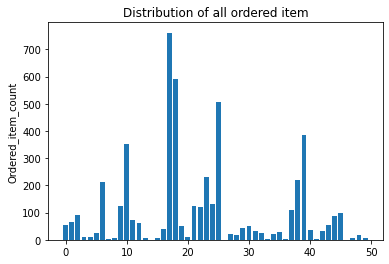

In [7]:
import matplotlib.pyplot as plt
import numpy as np

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('Ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

# 미니 퀴즈 - 1.1
* pandas에서 유용하게 사용되는 함수 value_counts()와 unique()의 차이점은 무엇인가?
        * 각 함수는 어떤 데이터 타입에 적용이 되는지, 어떤 기능을 가지고 있는지, 정확히 어떤 결과값을 반환하는지 실행해보자

In [9]:
print(chipo['item_name'].value_counts()[:10])
print('-----------------------------------------------')
print(chipo['item_name'].unique()[:10])

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64
-----------------------------------------------
['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


# <Step3. 데이터 전처리> : 나만의 조력자를 정의하자¶
[apply와 lambda 함수를 이용한 데이터 전처리]

# <Step4. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색
데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기

* 주문당 평균 계산금액 출력하기
* 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
* 각 아이템의 가격 구하기
* 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
* “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
* “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기

# 주문당 평균 계산 금액 출력하기

# [한 주문에 10달러 이상 사용한 주문 번호(id)출력하기]

# 각 아이템의 가격 구하기

# 가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

# "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기

# [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]
